In [1]:
import pandas as pd
import numpy as np
import json
import ast


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def df_save (df):
    """
                        ---What it does---
    Saves your df of choice to a .csv file in the same directory of the parent file

                        ---What it needs---
    * Your input for the name (be careful with adding spaces)
    * Your ready-to-save df
    """
    name = input("Type the name of your df> ")
    name = name + ".csv"
    df.to_csv(name, sep = ',')

In [3]:
df = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\keywords.csv')
df.head(1)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
id          46419 non-null int64
keywords    46419 non-null object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [5]:
df.keywords

0        [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1        [{'id': 10090, 'name': 'board game'}, {'id': 1...
2        [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3        [{'id': 818, 'name': 'based on novel'}, {'id':...
4        [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
                               ...                        
46414               [{'id': 10703, 'name': 'tragic love'}]
46415    [{'id': 2679, 'name': 'artist'}, {'id': 14531,...
46416                                                   []
46417                                                   []
46418                                                   []
Name: keywords, Length: 46419, dtype: object

In [6]:
keywords = pd.DataFrame(df.keywords)

In [7]:
data = keywords.iloc[0,0]
real_json_str = str(data)[1:-1]
real_json_str

"{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}"

In [8]:
keywords['keywords'] = keywords['keywords'].apply(ast.literal_eval)
keywords['id'] = keywords['keywords'].apply(lambda x: [i['id'] for i in x] if isinstance(x, list) else [])
keywords['keywords'] = keywords['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [9]:
keywords.head(2)

,keywords,id
0,"[jealousy, toy, boy, friendship, friends, riva...","[931, 4290, 5202, 6054, 9713, 9823, 165503, 17..."
1,"[board game, disappearance, based on children'...","[10090, 10941, 15101, 33467, 158086, 158091]"


In [10]:
keywords[keywords.astype(str)['keywords'] != '[]']

,keywords,id
0,"[jealousy, toy, boy, friendship, friends, riva...","[931, 4290, 5202, 6054, 9713, 9823, 165503, 17..."
1,"[board game, disappearance, based on children'...","[10090, 10941, 15101, 33467, 158086, 158091]"
2,"[fishing, best friend, duringcreditsstinger, o...","[1495, 12392, 179431, 208510]"
3,"[based on novel, interracial relationship, sin...","[818, 10131, 14768, 15160, 33455]"
4,"[baby, midlife crisis, confidence, aging, daug...","[1009, 1599, 2246, 4995, 5600, 10707, 13149, 3..."
...,...,...
46409,"[revenge, murder, serial killer, new york city...","[9748, 9826, 10714, 14512, 173245, 179083, 189..."
46410,[blair witch],[224180]
46411,"[witch, mythology, legend, serial killer, mock...","[616, 2035, 3754, 10714, 11800]"
46414,[tragic love],[10703]


In [11]:
def generator (df):
    keywords_2 = []
    id_2 = []
    for in_list in keywords.keywords:
        for i in in_list:
            keywords_2.append(i)
    for in_list in keywords.id:
        for i in in_list:
            id_2.append(i)
    keys = pd.DataFrame({'keywords': keywords_2, 'id': id_2})
    print ('Done')
    return keys
keys = generator(keywords)


Done


In [12]:
top_10_keywords = keys['keywords'].value_counts().head(10)
top_10_keywords

woman director      3115
independent film    1930
murder              1308
based on novel       835
musical              734
sex                  685
violence             651
nudity               636
biography            629
revenge              626
Name: keywords, dtype: int64

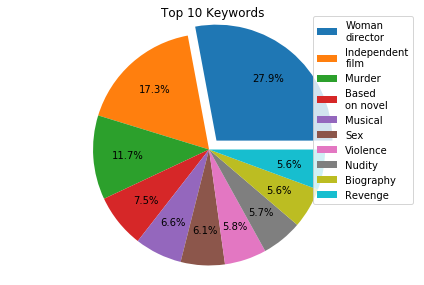

In [19]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
labels = 'Woman\ndirector', 'Independent\nfilm', 'Murder', 'Based\non novel', 'Musical', 'Sex', 'Violence', 'Nudity', 'Biography', 'Revenge'
plt.pie(top_10_keywords, autopct='%1.1f%%',  explode =  explode, pctdistance = 0.7)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.suptitle('Top 10 Keywords', fontsize=12)

plt.show();

In [15]:
# keys df ready for exporting
df_save(keys)